SNR before filtering: 6.02 dB
SNR after filtering: -0.25 dB


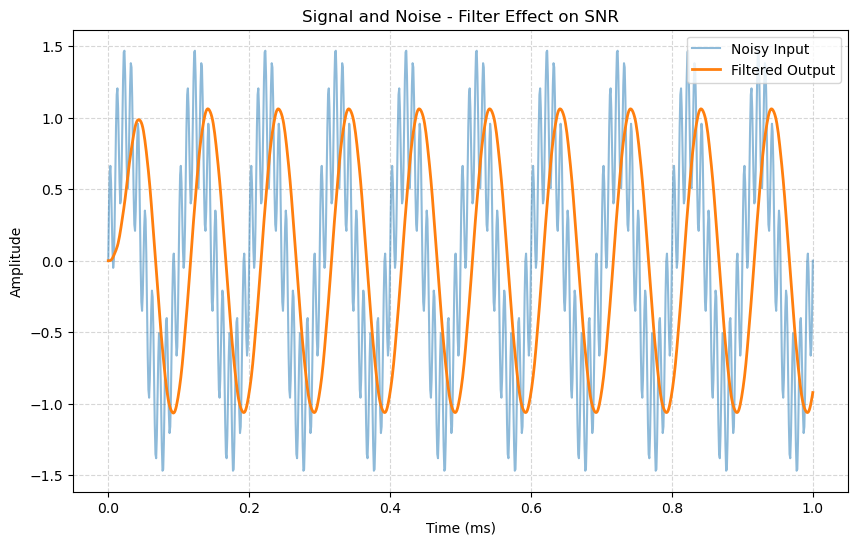

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate Synthetic Input Signal + Noise
fs = 1e6  # Sampling frequency (1 MHz)
t = np.arange(0, 1e-3, 1/fs)  # 1 ms duration

# Desired 10 kHz signal
f_signal = 10e3
signal_clean = np.sin(2 * np.pi * f_signal * t)

# High-frequency noise (e.g., 100 kHz)
f_noise = 100e3
noise = 0.5 * np.sin(2 * np.pi * f_noise * t)

# Combined input signal
Vin_noisy = signal_clean + noise

# Sallen-Key Filter Definition
R1 = 44e3
R2 = 12e3
R5 = 6.8e3
C1 = 150e-12
C2 = 1e-9
C5 = 1e-9

# RC stage
num_RC = [1]
den_RC = [R5 * C5, 1]

# Sallen-Key stage
omega_0 = 1 / np.sqrt(R1 * R2 * C1 * C2)
Q = np.sqrt((R2 * C2) / (R1 * C1)) / ((R1 + R2) / R1)
num_SK = [omega_0**2]
den_SK = [1, omega_0 / Q, omega_0**2]

# Combined filter
num_total = np.polymul(num_RC, num_SK)
den_total = np.polymul(den_RC, den_SK)
H_total = signal.TransferFunction(num_total, den_total)

# Filter the noisy signal
tout, Vout_filtered, _ = signal.lsim(H_total, Vin_noisy, t)

# Compute SNR (before and after filtering)
def compute_snr(signal_in, noise_in):
    rms_signal = np.sqrt(np.mean(signal_in**2))
    rms_noise = np.sqrt(np.mean(noise_in**2))
    return 20 * np.log10(rms_signal / rms_noise)

# SNR before filtering
snr_before = compute_snr(signal_clean, noise)
# SNR after filtering
# Compute noise residual after filter
residual_noise = Vout_filtered - signal_clean
snr_after = compute_snr(signal_clean, residual_noise)

print(f"SNR before filtering: {snr_before:.2f} dB")
print(f"SNR after filtering: {snr_after:.2f} dB")

#  Plot
plt.figure(figsize=(10, 6))
plt.plot(t*1e3, Vin_noisy, label='Noisy Input', alpha=0.5)
plt.plot(t*1e3, Vout_filtered, label='Filtered Output', linewidth=2)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.title('Signal and Noise - Filter Effect on SNR')
plt.show()
